In [1]:
import numpy as np
import readparse as parse
import pyvista as pv
import importlib

In [5]:
parse.pullPARSE(7821,1)
data = parse.readPARSE((7821,1))

In [6]:
data.compile_grid()
xseed,yseed = np.meshgrid(np.linspace(0,max(data.nodes[:,0]),20),np.linspace(0,max(data.nodes[:,1]),20))
seedpoints = np.vstack((xseed.ravel(),yseed.ravel(),np.zeros(20**2))).transpose()
fieldlines = data.fieldlines(seedpoints)

/home/nat/anaconda3/envs/solar/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/nat/anaconda3/envs/solar/lib/python3.11/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


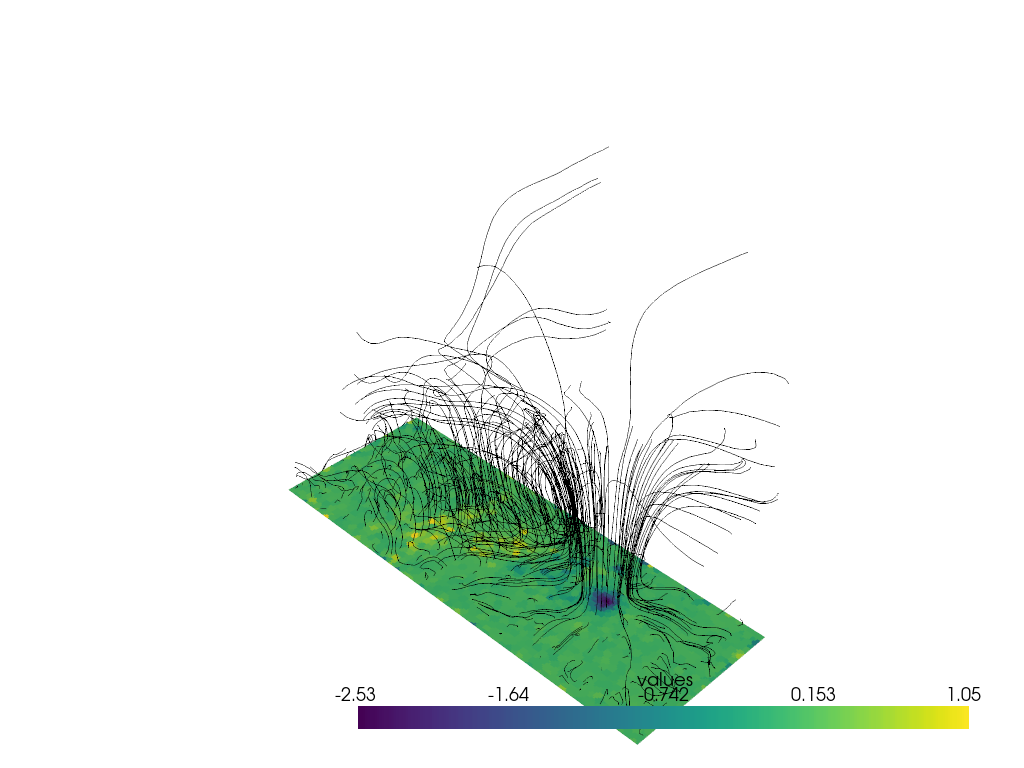

In [9]:
pl = pv.Plotter()
Zmesh = pv.ImageData()
Zmesh.dimensions = np.array([len(data.Bgrid.xcoords),len(data.Bgrid.ycoords),len(data.Bgrid.zcoords)])+1
Zmesh.spacing = data.Bgrid.grid_spacing
Zmesh.cell_data["values"] = data.Bgrid.vectors[:,:,:,2].ravel("F")
pl.add_mesh(Zmesh.slice(normal=[0,0,1],origin=[1e-2,1e-2,1e-2]))
for stream in fieldlines:
    pl.add_lines(stream,color='black',width=1,connected = True)
pl.show(jupyter_backend='trame')